# Basic Autoencoders

## Practice. DIGIT recognition

## Prepare Dataset

### Import package/dataset

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


### Data preprocessing – split train/test

In [3]:
# from sklearn import model_selection

# x_data = mnist.data
# y_data = mnist.target

# x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

### Data preprocessing

In [4]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelBinarizer

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

# encoder = LabelBinarizer()
# y_train_onehot = encoder.fit_transform(y_train)
# y_test_onehot = encoder.fit_transform(y_test)

In [5]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape input images
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

## AE model

In [6]:
# from keras import layers, models

# input_shape = (28*28, )

# input = layers.Input(input_shape)
# encoder1 = layers.Dense(500, activation='relu')(input)
# encoder2 = layers.Dense(300, activation='relu')(encoder1)
# encoder3 = layers.Dense(100, activation='relu')(encoder2)

# decoder1 = layers.Dense(300, activation='relu')(encoder3)
# decoder2 = layers.Dense(500, activation='relu')(decoder1)
# output = layers.Dense(28*28, activation='relu')(decoder2)

In [7]:
# AE = models.Model(input, output)
# AE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# AE.summary()

In [8]:
# history = AE.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

In [9]:
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.title('Mean Squared Error')
# plt.ylabel('MSE')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [10]:
# decoded_img = AE.predict(x_test_scaled[1].reshape(1, 28*28))
# plt.imshow(decoded_img.reshape(28,28))

## DAE model

In [11]:
# from keras import layers, models

# input_shape = (28*28, )

# input = layers.Input(input_shape)
# encoder1 = layers.Dense(500, activation='relu')(input)
# encoder2 = layers.Dense(300, activation='relu')(encoder1)
# encoder3 = layers.Dense(100, activation='relu')(encoder2)

# decoder1 = layers.Dense(300, activation='relu')(encoder3)
# decoder2 = layers.Dense(500, activation='relu')(decoder1)
# output = layers.Dense(28*28, activation='relu')(decoder2)

# DAE = models.Model(input, output)
# DAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# DAE.summary()

In [12]:
# x_train_noisy = x_train_sclaed = np.random.normal(0, 1, size=(x_train_scaled.shape[0], 28*28))
# x_test_noisy = x_test_sclaed = np.random.normal(0, 1, size=(x_test_scaled.shape[0], 28*28))

In [13]:
# history = DAE.fit(x_train_noisy, x_train_scaled, validation_data = [x_test_noisy, x_test_scaled], batch_size = 32, epochs = 20)

In [14]:
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.title('Mean Squared Error')
# plt.ylabel('MSE')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [15]:
# plt.imshow(x_test_scaled[1].reshape(28,28))

In [16]:
# plt.imshow(x_test_noisy[1].reshape(28,28))

In [17]:
# decoded_img = DAE.predict(x_test_scaled[1].reshape(1, 28*28))
# plt.imshow(decoded_img.reshape(28,28))

## CAE model

In [18]:
# x_train_scaled = x_train_scaled.reshape((-1, 28, 28, 1))
# x_test_scaled = x_test_scaled.reshape((-1, 28, 28, 1))

# input_shape = (28, 28, 1)

# input = layers.Input(input_shape)
# conv_enc = layers.Conv2D(1, (3, 3), padding='same', activation='relu')(input)
# pooling_enc = layers.MaxPooling2D((2,2))(conv_enc)
# flatten_enc = layers.Flatten()(pooling_enc)
# dense_enc = layers.Dense(100, activation='relu')(flatten_enc)

# dense_dec = layers.Dense(14*14, activation='relu')(dense_enc)
# dense_dec = tf.reshape(dense_dec, (-1, 14, 14, 1))
# upsample_dec = layers.UpSampling2D()(dense_dec)
# deconv_dec = layers.Conv2DTranspose(1, (3,3), padding='same', activation='sigmoid')(upsample_dec)
# output = deconv_dec

In [19]:
from keras import layers, models

# Reshape input images
x_train_scaled = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test_scaled = np.reshape(x_test, (len(x_test), 32, 32, 3))

# Define the Convolutional Autoencoder model
input = tf.keras.Input(shape=(32, 32, 3))

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [20]:
CAE = models.Model(input, decoded)
CAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
CAE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160  

In [22]:
history = CAE.fit(x_train_scaled, x_train_scaled, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/10
1563/1563 [==============================] - 207s 130ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 2/10
1563/1563 [==============================] - 191s 122ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 3/10
1563/1563 [==============================] - 194s 124ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 4/10
1563/1563 [==============================] - 193s 124ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5/10
1563/1563 [==============================] - 195s 125ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 6/10
1563/1563 [==============================] - 194s 124ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0107 - val_mean_squared_error:

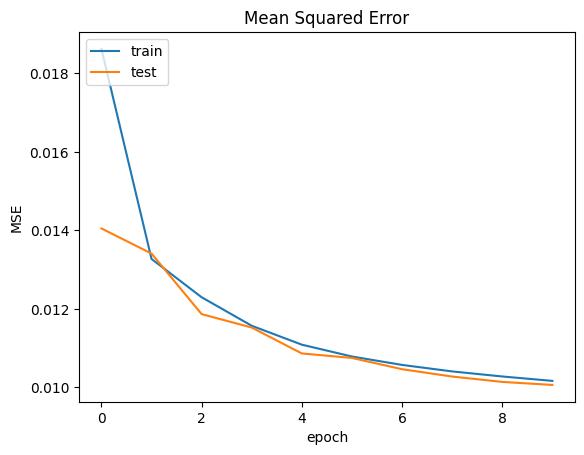

In [23]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# plt.imshow(x_test_scaled[1].reshape(28,28))

313/313 [==============================] - 10s 32ms/step


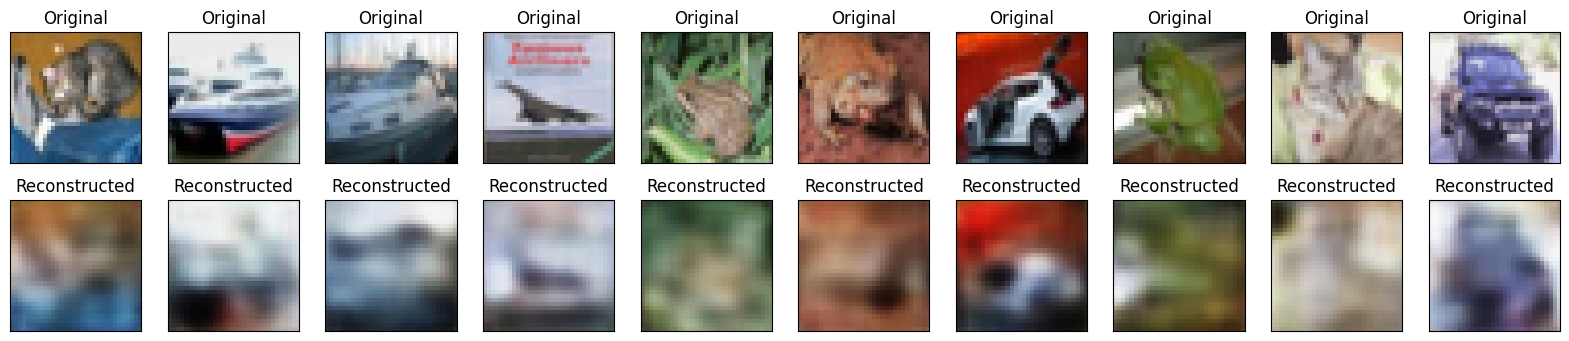

In [25]:
# Reconstruct images using the trained Autoencoder
reconstructed_images = CAE.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
# decoded_img = CAE.predict(x_test_scaled[1].reshape(1, 28, 28, 1))
# plt.imshow(decoded_img.reshape(28,28))

## VAE model

In [26]:
# class Sampling(layers.Layer):

#     def call(self, inputs):
#         z_mean, z_log_var = inputs
#         epsilon = tf.random.normal(shape=tf.shape(z_mean))

#         return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [27]:
# x_train_scaled = x_train_scaled.reshape((-1, 28*28))
# x_test_scaled = x_test_scaled.reshape((-1, 28*28))

# latent_dim = 5

# input_shape = (28*28, )

# input = layers.Input(input_shape)
# encoder1 = layers.Dense(300, activation='relu')(input)
# encoder2 = layers.Dense(100, activation='relu')(encoder1)
# encoder3 = layers.Dense(20, activation='relu')(encoder2)

# z_mean = layers.Dense(latent_dim)(encoder3)
# z_log_var = layers.Dense(latent_dim)(encoder3)
# z = Sampling()([z_mean, z_log_var])

# decoder1 = layers.Dense(20, activation='relu')(z)
# decoder2 = layers.Dense(100, activation='relu')(decoder1)
# decoder3 = layers.Dense(300, activation='relu')(decoder2)
# output = layers.Dense(28*28, activation='relu')(decoder3)

In [28]:
# Sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

In [35]:
from keras import layers, models

# Reshape input images
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

# Define the Variational Autoencoder model
latent_dim = 128

# Encoder
input = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(input)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Latent space
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)

z = tf.keras.layers.Lambda(sampling, name='z')([z_mean, z_log_var])

# Decoder
decoder_inputs = tf.keras.layers.Dense(8*8*64, activation='relu')(z)
decoder_reshape = tf.keras.layers.Reshape((8, 8, 64))(decoder_inputs)
x = tf.keras.layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(decoder_reshape)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
output = tf.keras.layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)


In [36]:
VAE = models.Model(input, output)
VAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
VAE.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 16, 16, 32)   896         ['input_5[0][0]']                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 8, 8, 64)     18496       ['conv2d_13[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 4096)         0           ['conv2d_14[0][0]']              
                                                                                            

In [43]:
history = VAE.fit(x_train_scaled, x_train_scaled, validation_data = [x_test_scaled, x_test_scaled], batch_size = 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 3/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 4/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 6/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0079 - val_mean_squared_error:

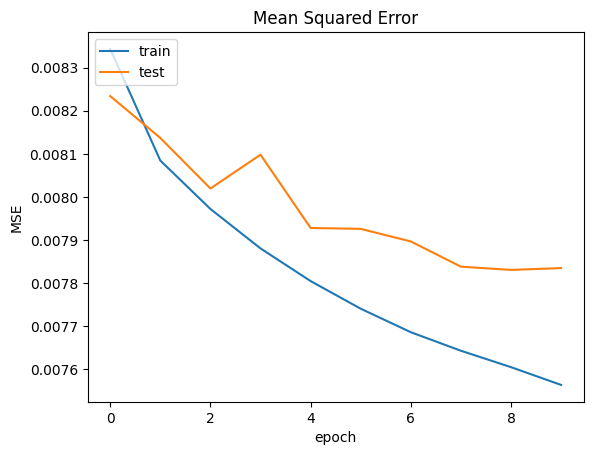

In [44]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# plt.imshow(x_test_scaled[1].reshape(28,28))

In [46]:
# decoded_img = VAE.predict(x_test_scaled[1].reshape(1, 28*28))
# plt.imshow(decoded_img.reshape(28,28))

1/1 [==============================] - 0s 255ms/step


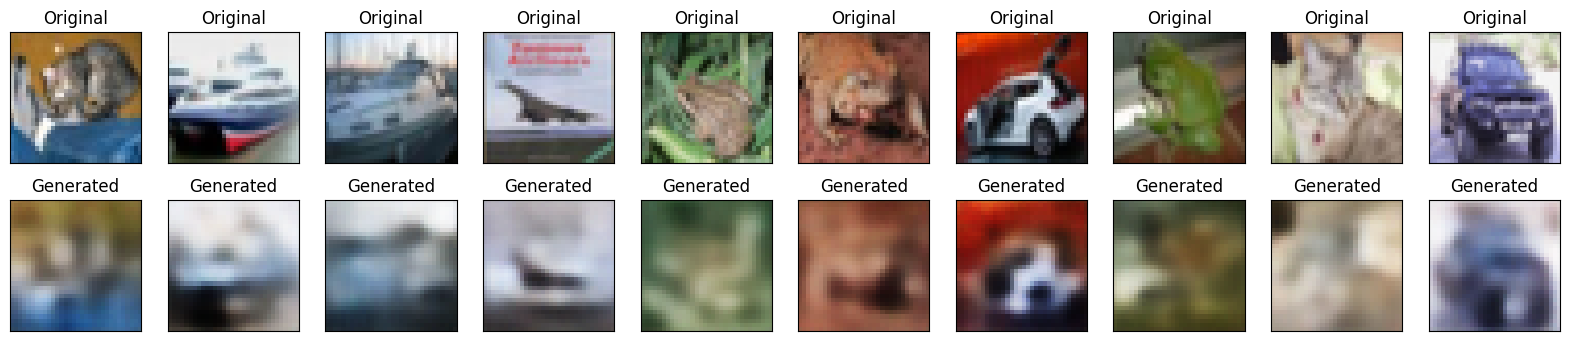

In [41]:
# Generate new images from the learned latent space
n = 10
decoded_imgs = VAE.predict(x_test[:n])

# Display original and generated images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display generated images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Generated")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()